**1. Importing Dependencies**


*  stable_baselines3[extra] 



In [ ]:
!pip install stable_baselines3[extra]

In [ ]:
import os # provides functions for interacting with the operating system
import gym    # to  work with pre existng environments
from stable_baselines3 import PPO # ppo algorithm
from stable_baselines3.common.vec_env import DummyVecEnv 
from stable_baselines3.common.evaluation import evaluate_policy

**2. Loading Environment**

In [ ]:
!apt-get install x11-utils > /dev/null 2>&1      # all the dependencies to work render() on colab
!pip install pyglet > /dev/null 2>&1 
!apt-get install -y xvfb python-opengl > /dev/null 2>&1

In [ ]:
!pip install gym pyvirtualdisplay > /dev/null 2>&1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay

In [ ]:
#Defining our display parameters
from pyvirtualdisplay import Display
display = Display(visible=0, size=(400, 300))
display.start()

In [ ]:
environment_name = 'CartPole-v0'   
env = gym.make(environment_name)    # creating environment for CartPole

GITHUB Documentation = https://github.com/openai/gym/blob/master/gym/envs/classic_control/cartpole.py

In [ ]:
env.action_space # 0. left 1. Right

Discrete(2)

In [ ]:
env.observation_space  # 0.Cart Position  1.Cart Velocity 2.Pole Angle(position) 3. Pole Angle Velocity

Box(-3.4028234663852886e+38, 3.4028234663852886e+38, (4,), float32)

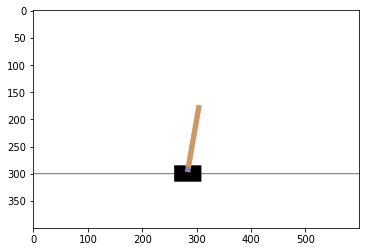

In [ ]:
episodes = 5
for episode in range(1,episodes+1):       # 5 episodes
  state = env.reset()                     # reset env for every episode
  done = False
  score = 0
  while not done:
    prev_screen = env.render(mode='rgb_array')  # rendering the env
    plt.imshow(prev_screen)
    ipythondisplay.clear_output(wait=True)
    ipythondisplay.display(plt.gcf())    
    action = env.action_space.sample()              # look into the documentation for action_space & observation_space 
    n_state,reward,done,info = env.step(action)
    score += reward
  print("Episode: {} Score: {}".format(episode,score))
ipythondisplay.clear_output(wait=True)
env.close()  


In [ ]:
env.close()

**3. Training an RL Model**

Classification of RL Algorithms: https://spinningup.openai.com/en/latest/spinningup/rl_intro2.html

Algorithm must be chosen based on our Actionspace: https://stable-baselines3.readthedocs.io/en/master/guide/algos.html

In [ ]:
log_path = os.path.join('Training','Logs')  # creating a path to save the training logs
 

In [ ]:
log_path

'Training/Logs'

In [ ]:
env = gym.make(environment_name)
env = DummyVecEnv([lambda: env])
model = PPO('MlpPolicy',env,verbose=1,tensorboard_log=log_path) #loading the ppo model by passing the required parameters

Using cuda device


In [ ]:
model.learn(total_timesteps=30000)  # training the model. Using one command LOL
# we can train for how many ever times we want.

**Save and Reload the Model**



*   So if we want to reload the model, for furthur training or testing, it can be done by saving this model and reloading it whenever needed.





In [ ]:
PPO_path = os.path.join('Training','Saved_Models','PPO_Model_Cartpole')

In [ ]:
PPO_path

'Training/Saved_Models/PPO_Model_Cartpole'

In [ ]:
model.save(PPO_path)

/usr/local/lib/python3.7/dist-packages/stable_baselines3/common/save_util.py:276: UserWarning: Path 'Training/Saved_Models' does not exist. Will create it.
  warnings.warn(f"Path '{path.parent}' does not exist. Will create it.")


In [ ]:
del model #deleting the model to reload it

In [ ]:
model.learn(total_timesteps = 1000)  # we get the error

NameError: ignored

In [ ]:
content_path = '/content/PPO_Model_Cartpole.zip'

In [ ]:
model = PPO.load(PPO_path,env = env)  #reloading the model

In [ ]:
model.learn(total_timesteps = 1000) #again training the already trained model.

Logging to Training/Logs/PPO_3
-----------------------------
| time/              |      |
|    fps             | 615  |
|    iterations      | 1    |
|    time_elapsed    | 3    |
|    total_timesteps | 2048 |
-----------------------------


In [ ]:
model1 = PPO.load(content_path,env = env)  #reloading the model from  content path

In [ ]:
model1.learn(total_timesteps = 2000) #again training the already trained model.

Logging to Training/Logs/PPO_4
-----------------------------
| time/              |      |
|    fps             | 616  |
|    iterations      | 1    |
|    time_elapsed    | 3    |
|    total_timesteps | 2048 |
-----------------------------


**Evaluation**


*  Evaluation metrics are mainly two core values. 
     1. ep_len_mean = average length of an episode
     2. ep_rew_mean = average reward accumulated per episode.
*   Reward for cartpole is calculated as 1 point for every step that the pole remains upright. (with a maximum of 200 steps)


*   If a pole is more than 15 degrees from vertcal or if cart moves more than 2.4 units, the episode ends






In [ ]:
# evaluating the model using evaluate_policy from  the stable baselines
evaluate_policy(model,env,n_eval_episodes=10)
# we can add an other keyword argument "render = True" to actually visualize. But it's  not gonna work in colab

/usr/local/lib/python3.7/dist-packages/stable_baselines3/common/evaluation.py:69: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  UserWarning,


(200.0, 0.0)

In [ ]:
evaluate_policy(model1,env,n_eval_episodes=10)

/usr/local/lib/python3.7/dist-packages/stable_baselines3/common/evaluation.py:69: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  UserWarning,


(200.0, 0.0)

In [ ]:
env.close()

**Testing the Model**


*   So the same for loop that we have executed in the top is used again. But here, we dont use a sample value. Instead, we use the value predicted by our agent aka model.Look into the return values using ??



In [ ]:
PPO?? # ?? for help
# copy pasting the same for loop. but passing the model.Predict

Use jupyter notebook for betterr visualization

In [ ]:
episodes = 5
for episode in range(1,episodes+1):       # 5 episodes
  obs = env.reset()                     # reset env for every episode
  done = False
  score = 0
  while not done:
    #prev_screen = env.render(mode='rgb_array')  # rendering the env
    #plt.imshow(prev_screen)
    #ipythondisplay.clear_output(wait=True)
    #ipythondisplay.display(plt.gcf())    
    action , _ = model1.predict(obs)             # predicting the value based on the observation(obs). As it return 2 vals, 2 variables on the left side. 
    obs,reward,done,info = env.step(action)
    score += reward
  print("Episode: {} Score: {}".format(episode,score))
#ipythondisplay.clear_output(wait=True)
env.close()  


Episode: 1 Score: [200.]
Episode: 2 Score: [200.]
Episode: 3 Score: [200.]
Episode: 4 Score: [169.]
Episode: 5 Score: [180.]


**Viewing Logs on the TensorBoard**

In [ ]:
training_log_path = os.path.join(log_path,'PPO_1') # we are gonna view log inside PPO_2 on tensor board

In [ ]:
training_log_path

'Training/Logs/PPO_1'

In [ ]:
!tensorboard --logdir={training_log_path}

2021-09-24 07:31:45.459822: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-24 07:31:45.469006: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-24 07:31:45.469697: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.6.0 at http://localhost:6006/ (Press CTRL